# Get Stocks Data

- Importing reusable "stock_data_loader.py" sequence to be able to reuse yfinance in getting the selected stocks data also in a selected range.
- How to use:
  - get_stock_data(ticker_found_in_yfinance, start_date[yyyy-MM-dd], end-date[yyyy-MM-dd])



In [1]:
from stock_data_loader import get_stock_data
from datetime import datetime,timedelta

In [2]:
df = get_stock_data("psei.ps","2023-01-01","2025-05-25")

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766,84400,0.0,0.0
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000,209900,0.0,0.0
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078,167200,0.0,0.0
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215,136700,0.0,0.0
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234,150100,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00+08:00,6482.870117,6482.870117,6445.020020,6454.839844,143000,0.0,0.0
2025-05-20 00:00:00+08:00,6458.270020,6458.270020,6335.330078,6335.330078,160700,0.0,0.0
2025-05-21 00:00:00+08:00,6343.799805,6375.350098,6315.040039,6375.350098,116100,0.0,0.0


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 2023-01-03 00:00:00+08:00 to 2025-05-23 00:00:00+08:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          584 non-null    float64
 1   High          584 non-null    float64
 2   Low           584 non-null    float64
 3   Close         584 non-null    float64
 4   Volume        584 non-null    int64  
 5   Dividends     584 non-null    float64
 6   Stock Splits  584 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 36.5 KB


In [650]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,584.000000,584.000000,584.000000,584.000000,5.840000e+02,584.0,584.0
mean,6572.414011,6707.711428,6533.708653,6568.591459,1.121670e+05,0.0,0.0
std,323.373018,2456.620061,324.800680,325.551107,1.064114e+05,0.0,0.0
min,5839.060059,5900.189941,5804.560059,5822.850098,0.000000e+00,0.0,0.0
25%,6334.795044,6374.277588,6300.672363,6334.112549,7.360000e+04,0.0,0.0
50%,6541.199951,6585.290039,6511.300049,6544.915039,9.135000e+04,0.0,0.0
75%,6731.947388,6774.217529,6700.705200,6731.022461,1.196000e+05,0.0,0.0
max,7535.339844,65444.898438,7488.990234,7554.680176,1.768700e+06,0.0,0.0


In [651]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [652]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

# Visualizing Dataframe

In [653]:
import mplfinance as mpf

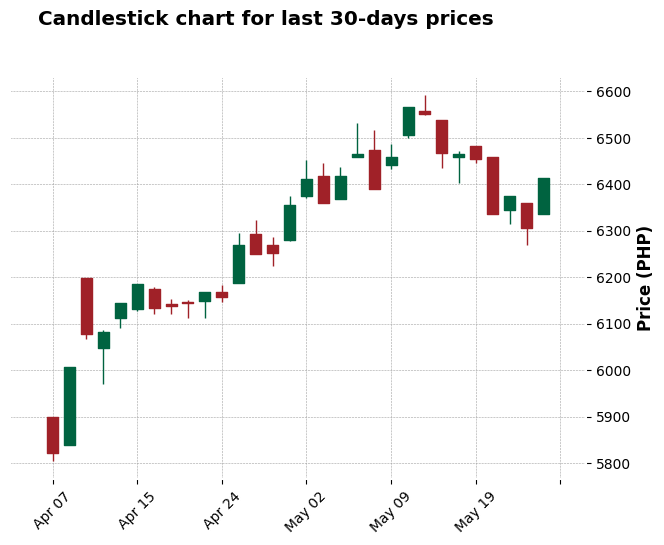

In [654]:
mpf.plot(df[-30:], type='candle', style='charles', title='Candlestick chart for last 30-days prices', ylabel='Price (PHP)')

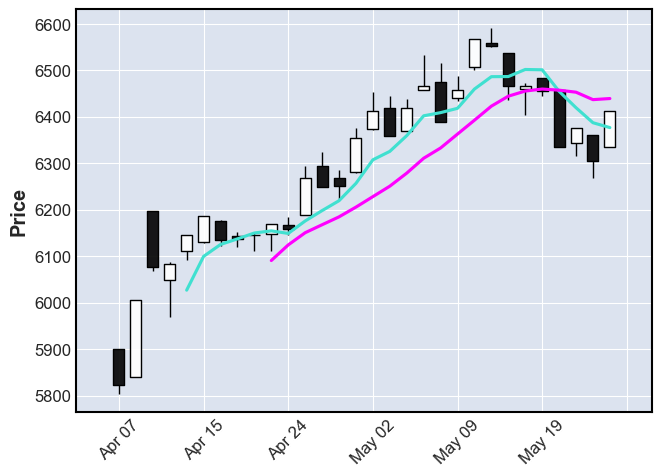

In [655]:
mpf.plot(df[-30:], type='candle', mav=(5, 10))

# Model Training

In [656]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [657]:
scaler = StandardScaler()

In [658]:
X = df[['Open', 'High', 'Low', 'Close']].copy()

In [659]:
X.head()

,Open,High,Low,Close
Date,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234


In [660]:
X.shape

(584, 4)

In [661]:
train_size = 0.8

In [662]:
split_index = int(len(X)*train_size)
split_index

467

## Model Training for 'Open' Price Data

In [663]:
data_open = X.copy()
data_open['Next_Open'] = data_open['Open'].shift(-1)
data_open.dropna(inplace = True)
data_open

,Open,High,Low,Close,Next_Open
Date,,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766,6601.500000
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000,6738.930176
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078,6736.649902
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215,6692.299805
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234,6783.399902
...,...,...,...,...,...
2025-05-16 00:00:00+08:00,6459.740234,6471.879883,6403.029785,6465.529785,6482.870117
2025-05-19 00:00:00+08:00,6482.870117,6482.870117,6445.020020,6454.839844,6458.270020
2025-05-20 00:00:00+08:00,6458.270020,6458.270020,6335.330078,6335.330078,6343.799805


In [664]:
X_open = data_open[['Open', 'High', 'Low', 'Close']]
y_open = data_open[['Next_Open']]

In [665]:
X_train_open = X_open.iloc[:split_index]
X_test_open = X_open.iloc[split_index:]
y_train_open = y_open.iloc[:split_index]
y_test_open = y_open.iloc[split_index:]

In [666]:
# scale training and testing dataset using StandardScaler()

X_train_open_scaled = scaler.fit_transform(X_train_open)
X_test_open_scaled = scaler.transform(X_test_open)

In [667]:
model_open = LinearRegression()

In [668]:
model_open.fit(X_train_open_scaled, y_train_open)

LinearRegression()

In [669]:
y_pred_open = model_open.predict(X_test_open_scaled)
y_pred_open.shape

(116, 1)

In [670]:
X_test_open.shape

(116, 4)

## Model Training for 'Low' Prices Data

In [671]:
data_low = X.copy()
data_low['Next_Low'] = data_low['Low'].shift(-1)
data_low.dropna(inplace = True)
data_low

,Open,High,Low,Close,Next_Low
Date,,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766,6601.500000
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000,6730.520020
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078,6666.680176
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215,6685.069824
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234,6740.029785
...,...,...,...,...,...
2025-05-16 00:00:00+08:00,6459.740234,6471.879883,6403.029785,6465.529785,6445.020020
2025-05-19 00:00:00+08:00,6482.870117,6482.870117,6445.020020,6454.839844,6335.330078
2025-05-20 00:00:00+08:00,6458.270020,6458.270020,6335.330078,6335.330078,6315.040039


In [672]:
X_low = data_low[['Open', 'Low', 'High', 'Close']]
y_low = data_low[['Next_Low']]

In [673]:
X_train_low = X_low.iloc[:split_index]
X_test_low = X_low.iloc[split_index:]

y_train_low = y_low.iloc[:split_index]
y_test_low = y_low.iloc[split_index:]

In [674]:
# scale training and testing dataset using StandardScaler()

X_train_low_scaled = scaler.fit_transform(X_train_low)
X_test_low_scaled = scaler.transform(X_test_low)

In [675]:
model_low = LinearRegression()

In [676]:
model_low.fit(X_train_low_scaled, y_train_low)

LinearRegression()

In [677]:
y_pred_low = model_low.predict(X_test_low_scaled)
y_pred_low.shape

(116, 1)

In [678]:
y_test_low.shape

(116, 1)

## Model Training for 'High' Prices Data

In [679]:
data_high = X.copy()
data_high['Next_High'] = data_high['High'].shift(-1)
data_high.dropna(inplace = True)
data_high

,Open,High,Low,Close,Next_High
Date,,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766,6755.270020
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000,6767.049805
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078,6736.649902
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215,6790.240234
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234,6783.399902
...,...,...,...,...,...
2025-05-16 00:00:00+08:00,6459.740234,6471.879883,6403.029785,6465.529785,6482.870117
2025-05-19 00:00:00+08:00,6482.870117,6482.870117,6445.020020,6454.839844,6458.270020
2025-05-20 00:00:00+08:00,6458.270020,6458.270020,6335.330078,6335.330078,6375.350098


In [680]:
X_high = data_high[['Open', 'Low', 'High', 'Close']]
y_high = data_high[['Next_High']]

In [681]:
X_train_high = X_high.iloc[:split_index]
X_test_high = X_high.iloc[split_index:]
y_train_high = y_high.iloc[:split_index]
y_test_high = y_high.iloc[split_index:]

In [682]:
# scale training and testing dataset using StandardScaler()

X_train_high_scaled = scaler.fit_transform(X_train_high)
X_test_high_scaled = scaler.transform(X_test_high)

In [683]:
model_high = LinearRegression()

In [684]:
model_high.fit(X_train_high_scaled, y_train_high)

LinearRegression()

In [685]:
y_pred_high = model_high.predict(X_test_high_scaled)
y_pred_high.shape

(116, 1)

In [686]:
y_test_high.shape

(116, 1)

## Model Training for 'Close' Prices Data

In [687]:
data_close = X.copy()
data_close['Next_Close'] = data_close['Close'].shift(-1)
data_close.dropna(inplace = True)
data_close

,Open,High,Low,Close,Next_Close
Date,,,,,
2023-01-03 00:00:00+08:00,6555.399902,6624.759766,6550.169922,6586.009766,6718.500000
2023-01-04 00:00:00+08:00,6601.500000,6755.270020,6601.500000,6718.500000,6761.330078
2023-01-05 00:00:00+08:00,6738.930176,6767.049805,6730.520020,6761.330078,6667.970215
2023-01-06 00:00:00+08:00,6736.649902,6736.649902,6666.680176,6667.970215,6790.240234
2023-01-09 00:00:00+08:00,6692.299805,6790.240234,6685.069824,6790.240234,6756.689941
...,...,...,...,...,...
2025-05-16 00:00:00+08:00,6459.740234,6471.879883,6403.029785,6465.529785,6454.839844
2025-05-19 00:00:00+08:00,6482.870117,6482.870117,6445.020020,6454.839844,6335.330078
2025-05-20 00:00:00+08:00,6458.270020,6458.270020,6335.330078,6335.330078,6375.350098


In [688]:
X_close = data_close[['Open', 'Low', 'High', 'Close']]
y_close = data_close[['Next_Close']]

In [689]:
X_train_close = X_close.iloc[:split_index]
X_test_close = X_close.iloc[split_index:]

y_train_close = y_close.iloc[:split_index]
y_test_close = y_close.iloc[split_index:]

In [690]:
X_train_close_scaled = scaler.fit_transform(X_train_close)
X_test_close_scaled = scaler.transform(X_test_close)

In [691]:
model_close = LinearRegression()

In [692]:
model_close.fit(X_train_close_scaled, y_train_close)

LinearRegression()

In [693]:
y_pred_close = model_close.predict(X_test_close_scaled)
y_pred_close.shape

(116, 1)

In [694]:
y_test_close.shape

(116, 1)

# Visualize Results Per Prices

In [695]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [696]:
def plot_graph(actual, predicted):
    plt.figure(figsize=(10,5))
    plt.plot(actual.values, label="Actual Prices", color = "grey")
    plt.plot(predicted, label = "Predicted Prices", color = "blue")
    plt.title("Actual vs. Predicted Prices")
    plt.xlabel("Time(Days)")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.4f}")

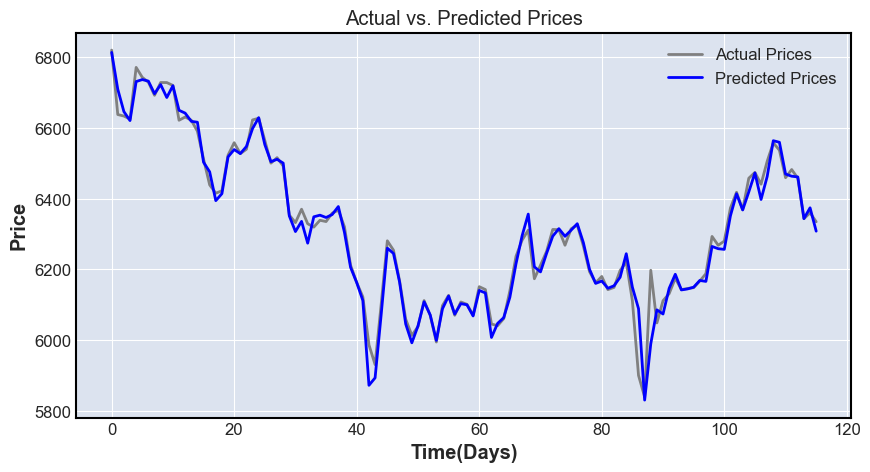

MAE: 18.79
RMSE: 34.59
R2: 0.9745


In [697]:
plot_graph(y_test_open, y_pred_open)

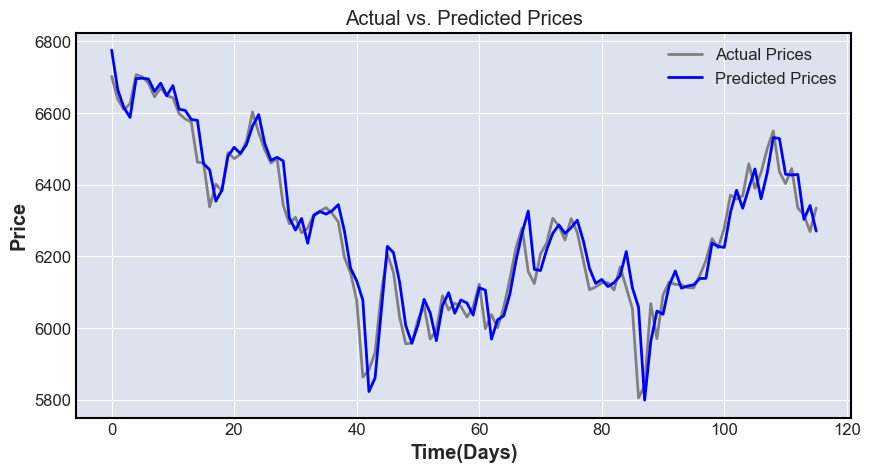

MAE: 40.61
RMSE: 57.37
R2: 0.9309


In [698]:
plot_graph(y_test_low, y_pred_low)

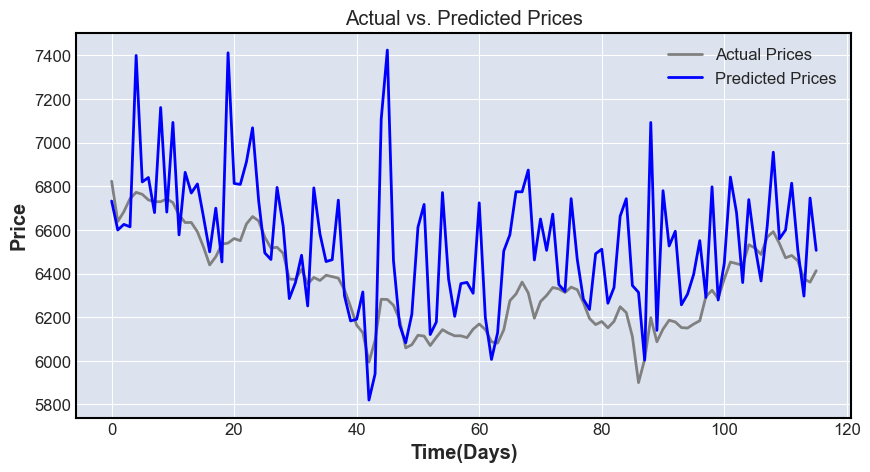

MAE: 228.98
RMSE: 312.49
R2: -1.2098


In [699]:
plot_graph(y_test_high, y_pred_high)

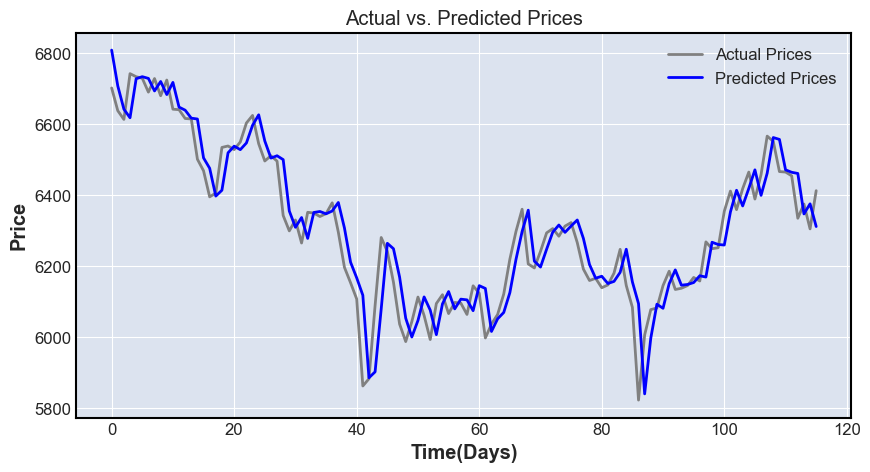

MAE: 57.42
RMSE: 76.74
R2: 0.8725


In [700]:
plot_graph(y_test_close, y_pred_close)

# Actual Model Predictions

In [701]:
def predict_prices(opn, low, high, clse):
    data = np.array([[opn, low, high, clse]])
    data = pd.DataFrame(data, columns=['Open', 'Low', 'High', 'Close'])
    data = scaler.transform(data)
    
    open_value = model_open.predict(data)[0][0]
    high_value = model_high.predict(data)[0][0]
    low_value = model_low.predict(data)[0][0]
    close_value = model_close.predict(data)[0][0]

    olhc_array = np.array([open_value, low_value, high_value, close_value])

    return olhc_array

In [702]:
predict_prices(6387.32,6374.91,6399.85,6384.62)

array([6421.83147926, 6362.35265904, 6466.78046715, 6392.05356311])

In [756]:
def predict_candle(ticker="psei.ps",day_range=10):
    
    start_date = datetime.today() - timedelta(days=2)
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = datetime.today() - timedelta(days=1)
    end_date = end_date.strftime("%Y-%m-%d")
    
    df_predict = get_stock_data(ticker,start_date,end_date)
    df_predict = df_predict[['Open','High','Low','Close']]
    df_predict.index = pd.to_datetime(df_predict.index).tz_localize(None)

    r = 0
    d = -1
    day_val = day_range
    while day_val != 0:
        olhc_array = predict_prices(float(df_predict['Open'].iloc[r]), float(df_predict['High'].iloc[r]), float(df_predict['Low'].iloc[r]), float(df_predict['Close'].iloc[r]))
        
        date_value = datetime.today() + timedelta(days=d)
        date = pd.to_datetime(date_value.strftime("%Y-%m-%d"))
        
        new_df = pd.DataFrame([olhc_array], columns = ['Open','High', 'Low','Close'], index = [date])
        df_predict = pd.concat([df_predict, new_df])
        
        day_val -= 1
        r += 1
        d += 1

    mpf.plot(df_predict, type='candle', title=f"Predicted {day_range}-days prices of {ticker}", ylabel="Price (PHP)")
    print(df_predict)

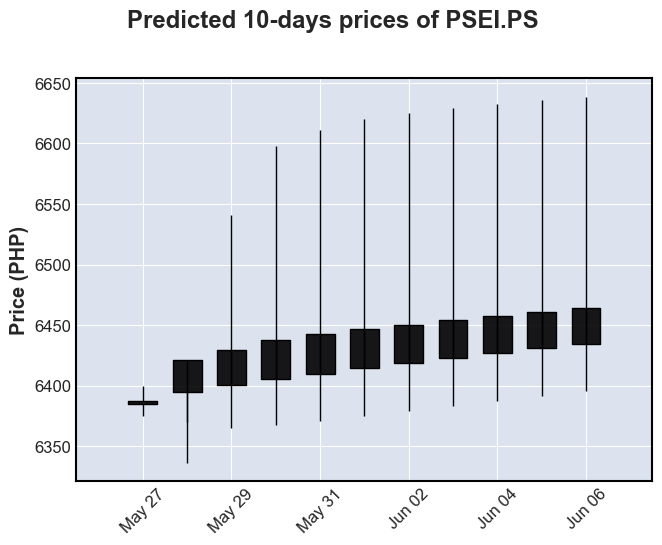

                   Open         High          Low        Close
2025-05-27  6387.319824  6399.850098  6374.910156  6384.620117
2025-05-28  6421.359819  6369.858141  6336.658072  6395.091072
2025-05-29  6429.205839  6365.258802  6540.691652  6400.788946
2025-05-30  6437.814348  6367.604518  6597.798791  6405.498301
2025-05-31  6442.794120  6371.104799  6611.441585  6410.004574
2025-06-01  6446.793390  6375.186025  6620.063600  6414.335482
2025-06-02  6450.555321  6379.412295  6625.124718  6418.562691
2025-06-03  6454.163948  6383.625207  6628.889059  6422.710085
2025-06-04  6457.681948  6387.787451  6632.289110  6426.783659
2025-06-05  6461.131793  6391.885819  6635.518966  6430.786684
2025-06-06  6464.519806  6395.916458  6638.654759  6434.721061


In [757]:
predict_candle("PSEI.PS", 10)